In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'c:\Temp\medical.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


In [7]:
df.isnull().any(axis=1)   # 행별 열방향중 하나라도 널값이 있는지조사

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [8]:
df.isnull().any(axis=0)

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
SMS_received      False
No-show           False
dtype: bool

In [9]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [10]:
df=df[df.Age>=0]

In [11]:
df['No-show']=df['No-show'].map({'Yes':1,'No':0})

In [12]:
df['No-show'].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

In [ ]:
df.Age.min()

0

In [ ]:
74892/(74892+35435)

0.67881842160124

In [ ]:
2042/(1082285+2042)

0.0018831957518350092

In [ ]:
df.SMS_received.value_counts()

0    74892
1    35435
Name: SMS_received, dtype: int64

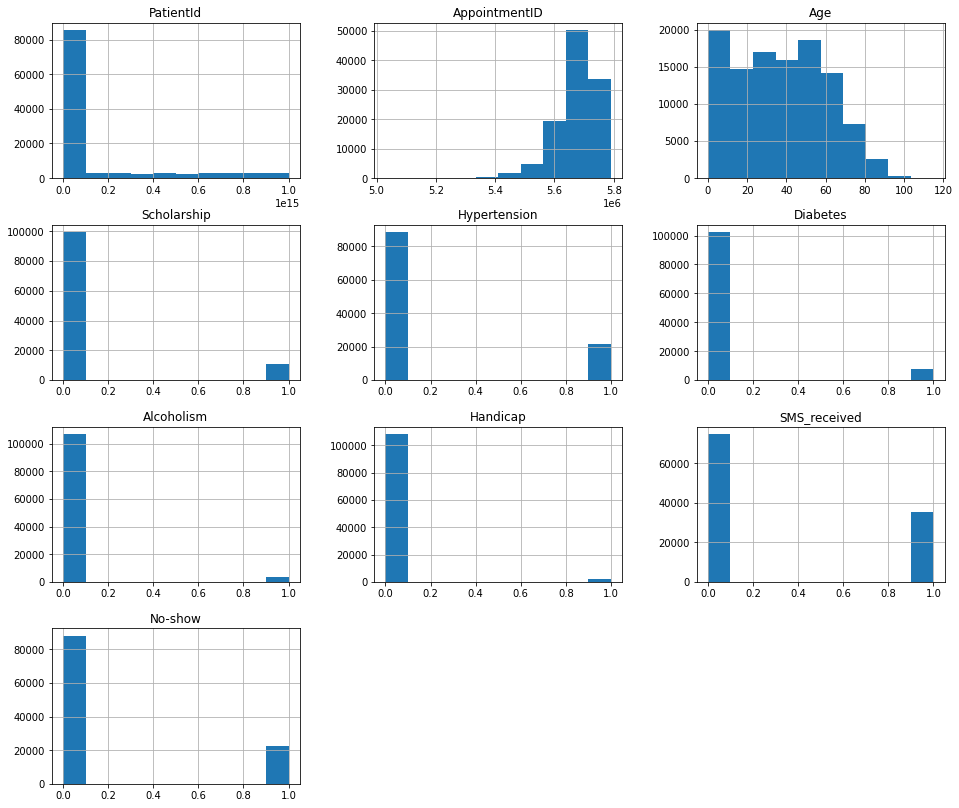

In [ ]:
df.hist(figsize=(16,14));

In [13]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


In [15]:
df['waiting_day']=df['AppointmentDay'].dt.dayofyear-df['ScheduledDay'].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
 9   waiting_day     110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(2)
memory usage: 9.3+ MB


In [16]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.321029,0.201934,9.979046
std,2.560937e+14,7.129544e+04,23.110026,0.466874,0.401445,15.607516
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,-223.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000,0.000000,4.000000
75%,9.440000e+13,5.725523e+06,55.000000,1.000000,0.000000,15.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,146.000000


In [17]:
df=df[df.waiting_day>=0]

In [18]:
df['waiting_day'].min()

0

In [19]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

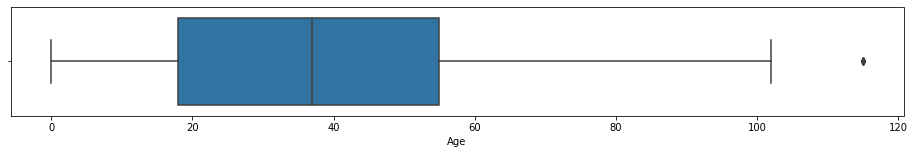

In [20]:
plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)

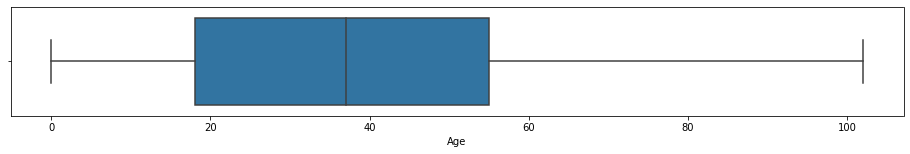

In [21]:
df=df[df.Age<=110]
plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)

In [22]:
a=df[df.waiting_day==0]['waiting_day'].value_counts()
b=df[(df['waiting_day']==0)&(df['No-show']==1)]['waiting_day'].value_counts()
b/a

0    0.046472
Name: waiting_day, dtype: float64

In [23]:
no_show=df[df['No-show']==1]
show=df[df['No-show']==0]

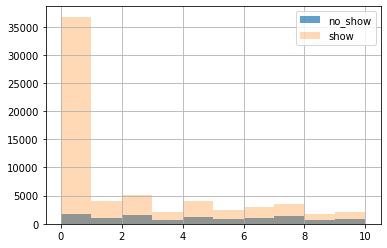

In [24]:
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='show')
plt.legend()

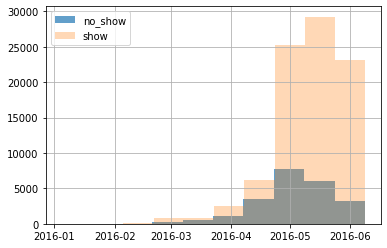

In [25]:
no_show['ScheduledDay'].hist(alpha=0.7,label='no_show')
show['ScheduledDay'].hist(alpha=0.3,label='show')
plt.legend()

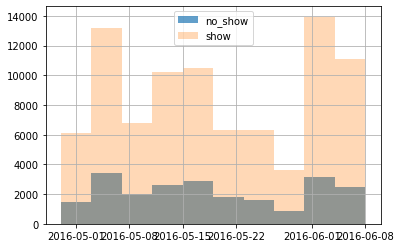

In [26]:
no_show['AppointmentDay'].hist(alpha=0.7,label='no_show')
show['AppointmentDay'].hist(alpha=0.3,label='show')
plt.legend()

In [27]:
df.PatientId.value_counts().iloc[0:10]

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: PatientId, dtype: int64

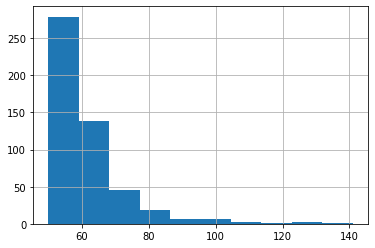

In [53]:
df.PatientId.value_counts().iloc[0:500].hist()

In [54]:
df.PatientId.value_counts().iloc[0:500]

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
4.170000e+14     50
9.590000e+14     50
7.220000e+13     50
2.730000e+12     50
3.690000e+13     50
Name: PatientId, Length: 500, dtype: int64

In [55]:
df[(df['waiting_day']>=50) & (df['No-show']==1)].PatientId.value_counts().iloc[0:10]

3.380000e+14    6
7.250000e+13    4
7.850000e+13    4
8.340000e+12    4
5.670000e+12    3
2.590000e+13    3
9.630000e+14    3
4.970000e+12    3
9.460000e+14    3
3.370000e+13    3
Name: PatientId, dtype: int64

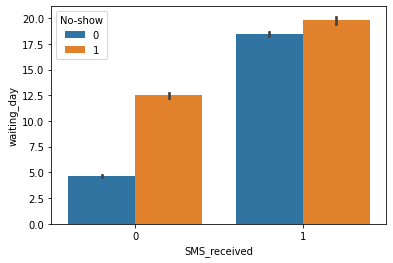

In [56]:
sns.barplot(y='waiting_day', x='SMS_received', hue='No-show', data=df)

In [70]:
a=len(df[(df['SMS_received']==0) & (df['No-show']==1)])
b=len(df[(df['SMS_received']==0) & (df['No-show']==0)])
print(f'SMS_received가 0일때 노쇼:{a}')
print(f'SMS_received가 0일때 쇼:{b}')
print(f'SMS_received가 0일때 노쇼비율:{a/(a+b)}')
c=len(df[(df['SMS_received']==1) & (df['No-show']==1)])
d=len(df[(df['SMS_received']==1) & (df['No-show']==0)])
print(f'SMS_received가 1일때 노쇼:{c}')
print(f'SMS_received가 1일때 쇼:{d}')
print(f'SMS_received가 1일때 노쇼비율:{c/(c+d)}')

SMS_received가 0일때 노쇼:12522
SMS_received가 0일때 쇼:62494
SMS_received가 0일때 노쇼비율:0.1669243894635811
SMS_received가 1일때 노쇼:9770
SMS_received가 1일때 쇼:25668
SMS_received가 1일때 노쇼비율:0.2756927591850556


In [72]:
9770/25668

0.38062957768427613

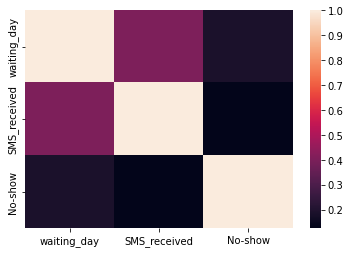

In [64]:
temp=df[['waiting_day','SMS_received','No-show']].corr()
sns.heatmap(temp)

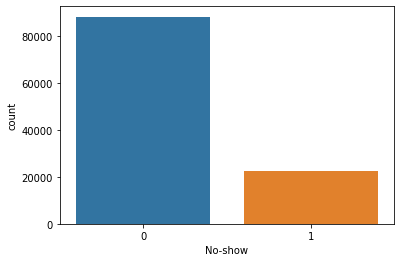

In [73]:
sns.countplot(x='No-show',data=df)

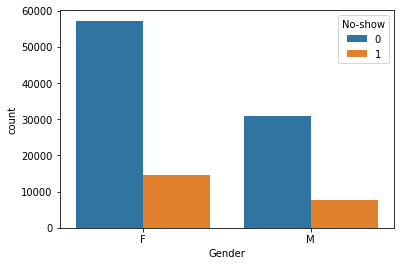

In [74]:
sns.countplot(x='Gender',hue='No-show',data=df)

In [76]:
여성인원수= df[(df['Gender']=='F') & (df['No-show']==1)]['Gender'].value_counts()
남성인원수=df[(df['Gender']=='M') & (df['No-show']==1)]['Gender'].value_counts()
전체여성수=df[df["Gender"]=='F']['Gender'].value_counts()

전체남성수=df[df["Gender"]=='M']['Gender'].value_counts()
print(여성인원수/전체여성수)
print(남성인원수/전체남성수)

F    0.203062
Name: Gender, dtype: float64
M    0.199519
Name: Gender, dtype: float64


1.얼마나 많은 환자가 예정된 시간에 오지 않았는가?

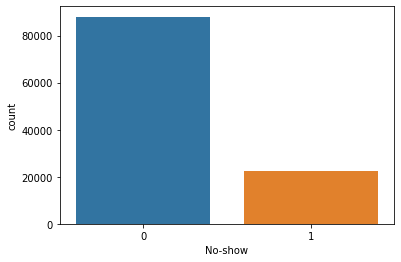

In [ ]:
sns.countplot(x='No-show', data=df)

쇼/노쇼 환자의 성별 분포는 어떻게 되는가?

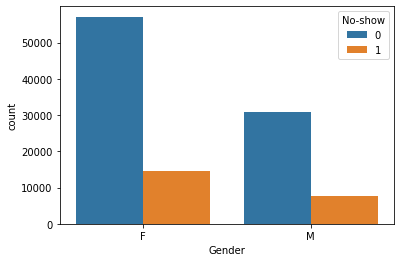

In [ ]:
sns.countplot(x='Gender', hue='No-show',data=df)

In [ ]:
df[(df['Gender']=='F') & (df['No-show']==1)]['Gender'].value_counts()

F    14551
Name: Gender, dtype: int64

In [ ]:
df[(df['Gender']=='M') & (df['No-show']==1)]['Gender'].value_counts()

M    7700
Name: Gender, dtype: int64

In [ ]:
df[(df['Gender']=='F')]['Gender'].value_counts()

F    71677
Name: Gender, dtype: int64

In [ ]:
df[(df['Gender']=='M')]['Gender'].value_counts()

M    38578
Name: Gender, dtype: int64

In [ ]:
14551/71677

0.2030079383902786

In [ ]:
8800/38578

0.22810928508476333

여성의 경우 20% 노쇼,
남성의 경우 22% 노쇼
-> 성별이 영향을 주진 않는다.